In [1]:
import tensorflow as tf 
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

# defining class names

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [2]:
#importing model saved in tflite format

TF_MODEL_FILE_PATH = r"W:\tensorflow\models/intel_image_classification.tflite"

interpreter = tf.lite.Interpreter(TF_MODEL_FILE_PATH)

In [3]:
#getting input and output layers

interpreter.get_signature_list()

{'serving_default': {'inputs': ['rescaling_input'], 'outputs': ['dense_1']}}

In [4]:
# making a classifier for inferencing using the trained model  

classifier = interpreter.get_signature_runner()

In [5]:
# declaring file paths for our sorting function
dest_buildings = r"W:\tensorflow\intel_image_classification\sorter\buildings"
dest_forest = r"W:\tensorflow\intel_image_classification\sorter\forest"
dest_glacier = r"W:\tensorflow\intel_image_classification\sorter\glacier"
dest_mountain = r"W:\tensorflow\intel_image_classification\sorter\mountain"
dest_sea = r"W:\tensorflow\intel_image_classification\sorter\sea"
dest_street = r"W:\tensorflow\intel_image_classification\sorter\street"


In [6]:
# class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# defining our sorting function. it makes copies of the images in their own directories based on the infered results from our model
def sorter():
    if class_names[np.argmax(score)] == "buildings":
        shutil.copy(image_path[i], dest_buildings)

    if class_names[np.argmax(score)] == "forest":
        shutil.copy(image_path[i], dest_forest)

    if class_names[np.argmax(score)] == "glacier":
        shutil.copy(image_path[i], dest_glacier)
        
    if class_names[np.argmax(score)] == "mountain":
        shutil.copy(image_path[i], dest_mountain)

    if class_names[np.argmax(score)] == "sea":
        shutil.copy(image_path[i], dest_sea)

    if class_names[np.argmax(score)] == "street":
        shutil.copy(image_path[i], dest_street)

In [7]:
# initializing count variables
building_count = 0
forest_count = 0
glacier_count = 0
mountain_count = 0
sea_count = 0
street_count = 0
# defining our count function
def counter():
    global building_count
    global forest_count
    global glacier_count 
    global mountain_count 
    global sea_count 
    global street_count

    if class_names[np.argmax(score)] == "buildings":
        building_count = building_count + 1

    if class_names[np.argmax(score)] == "forest":
        forest_count = forest_count + 1

    if class_names[np.argmax(score)] == "glacier":
        glacier_count = glacier_count + 1

    if class_names[np.argmax(score)] == "mountain":
        mountain_count = mountain_count + 1

    if class_names[np.argmax(score)] == "sea":
        sea_count = sea_count + 1

    if class_names[np.argmax(score)] == "street":
        street_count = street_count + 1

in the cell below, we loop over each image in the directory and run it through our trained model for inference

the images are then sorted into their own directories based on the output from the model

there is also a counter function which counts the number of images in a given class. a visualization of the said is provided in the last cell

In [8]:
image_path = glob.glob(r"W:\tensorflow\intel_image_classification\seg_pred\seg_pred\*.*")

for i in range(len(image_path)):
    #loading the image that's being predicted
    pred_image = tf.keras.utils.load_img(image_path[i], target_size= (150, 150))

    # converting image to float32 so the model can accept the image
    pred_image = np.float32(pred_image)

    # creating a batch
    image_array = tf.expand_dims(pred_image, 0)

    predictions = classifier(rescaling_input= image_array)["dense_1"]
    # scaling the logits returned by prediction into probabilities
    score = tf.nn.softmax(predictions)

    # argmax returns the index and max returns the highest score
    print(f"the image belongs to {class_names[np.argmax(score)]} with the confidence of {np.max(score)}")

    # calling the sorting function
    sorter()
    # calling the counter function
    counter()

the image belongs to buildings with the confidence of 0.6587125062942505
the image belongs to mountain with the confidence of 0.726667046546936
the image belongs to buildings with the confidence of 0.7813197374343872
the image belongs to mountain with the confidence of 0.975814938545227
the image belongs to mountain with the confidence of 0.643807590007782
the image belongs to forest with the confidence of 1.0
the image belongs to sea with the confidence of 0.9999779462814331
the image belongs to glacier with the confidence of 0.9994348883628845
the image belongs to sea with the confidence of 0.9992496371269226
the image belongs to street with the confidence of 0.981582522392273
the image belongs to sea with the confidence of 0.9988505840301514
the image belongs to forest with the confidence of 0.7745301723480225
the image belongs to sea with the confidence of 0.5418663024902344
the image belongs to buildings with the confidence of 1.0
the image belongs to buildings with the confidence

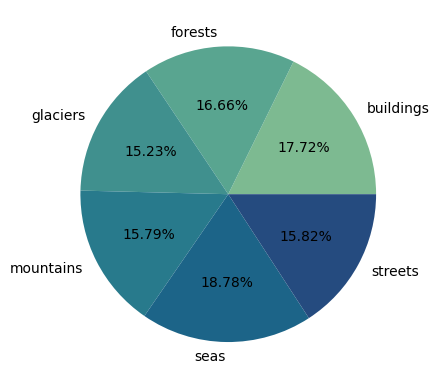

****************************************************************************************************
buildings: 1294
****************************************************************************************************
forests: 1216
****************************************************************************************************
glaciers: 1112
****************************************************************************************************
mountains: 1153
****************************************************************************************************
seas: 1371
****************************************************************************************************
streets: 1155


In [9]:
sizes = [building_count, forest_count, glacier_count, mountain_count, sea_count, street_count]
labels = "buildings", "forests", "glaciers", "mountains", "seas", "streets"

color_pallete = sns.color_palette("crest")

# autopct is used to display percent values in a string format in the piechart
plt.pie(sizes, labels= labels, autopct= '%.2f%%', colors= color_pallete)
plt.show()

for count, name in zip(sizes, labels):
    print("*" * 100)
    print(f"{name}: {count}")